In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import requests
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
import tensorflow as tf

print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


In [4]:
# Getting the data
X_train= pd.read_parquet('/kaggle/input/ensemble-check/content/drive/MyDrive/ADIA/data/X_train.parquet')
X_test=pd.read_parquet('/kaggle/input/ensemble-check/content/drive/MyDrive/ADIA/data/X_test.parquet')
y_train=pd.read_parquet('/kaggle/input/ensemble-check/content/drive/MyDrive/ADIA/data/y_train.parquet')

In [5]:
X_train.head()

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,-0.909515,0.388808,-1.535913,-0.133312,-1.826404,-0.532795,0.351273,0.158866,...,-0.731349,-0.456020,-0.257331,0.396074,0.318007,-0.538754,-0.625193,-0.753419,0.154403,1.069385
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.107694,-0.097967,-0.539599,-0.331276,-0.942609,-0.054123,-1.212772,1.688034,...,0.610428,-0.984907,-0.429806,0.199055,0.202587,1.612578,0.302153,-0.165713,0.905807,0.083180
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.092316,0.052596,-0.652025,1.218241,0.382968,-0.861838,-0.318937,-0.744261,...,0.212365,-0.046016,1.147463,0.696961,-0.574426,1.255969,0.270394,1.272939,-0.643112,0.433585
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,4.119639,1.018918,3.687519,1.597563,0.055918,-1.406041,0.652994,0.251138,...,1.254787,-1.155922,-1.108540,-2.046100,1.311100,-0.322965,0.999248,-1.238640,0.882844,-1.333590
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,0.109644,-0.290280,-0.278987,-0.603259,0.136952,-1.725076,-0.062219,-0.183102,...,-2.007721,-0.482311,-0.269142,-0.899796,1.083332,0.674665,-1.095657,-0.402669,0.677189,0.319992


In [6]:
X_train.shape

(742670, 463)

In [5]:
X_train.describe()

,date,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,460
count,742670.000000,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,...,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05
mean,159.526463,1.284116e-10,1.540939e-11,-2.825055e-11,-6.163756e-11,1.348322e-10,-2.568232e-12,-7.191048e-11,1.335480e-10,-3.467113e-11,...,8.218341e-11,1.130022e-10,-1.027293e-11,-2.028903e-10,8.218341e-11,-1.540939e-11,-1.181387e-10,-7.704695e-11,-1.232751e-10,1.849127e-10
std,69.838953,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-6.261024e+00,-5.071468e+00,-4.707472e+00,-9.938923e+00,-6.866098e+00,-6.654506e+00,-1.001759e+01,-9.518451e+00,-7.745412e+00,...,-8.473229e+00,-4.633243e+00,-8.560513e+00,-4.718935e+00,-7.037115e+00,-4.417604e+00,-9.344660e+00,-5.903621e+00,-1.334405e+01,-1.028470e+01
25%,110.000000,-6.739395e-01,-6.541329e-01,-6.802955e-01,-5.891749e-01,-6.684516e-01,-6.526968e-01,-5.842146e-01,-6.634518e-01,-6.518828e-01,...,-6.648314e-01,-6.994224e-01,-6.662166e-01,-6.315326e-01,-6.802900e-01,-6.629974e-01,-6.558463e-01,-6.724783e-01,-6.729455e-01,-6.233730e-01
50%,163.000000,-2.538679e-02,-3.315788e-02,-1.790448e-02,3.379633e-02,-1.937055e-02,-5.407786e-03,4.602176e-02,7.003009e-03,-1.642204e-02,...,-2.929448e-03,-3.116671e-02,-2.230417e-03,-6.742083e-03,1.107542e-02,-4.374430e-02,2.156746e-02,2.368831e-03,2.270385e-03,1.908572e-02
75%,220.000000,6.563462e-01,6.099522e-01,6.501519e-01,6.565697e-01,6.498887e-01,6.430400e-01,6.505666e-01,6.668940e-01,6.300462e-01,...,6.564976e-01,6.558738e-01,6.619603e-01,6.061414e-01,6.775671e-01,6.045398e-01,6.844997e-01,6.601428e-01,6.774270e-01,6.585824e-01
max,268.000000,5.421272e+00,9.006263e+00,7.850448e+00,4.292451e+00,9.759359e+00,6.516186e+00,4.168461e+00,5.217637e+00,1.240517e+01,...,9.845173e+00,1.008965e+01,5.559939e+00,1.017363e+01,6.631126e+00,9.228049e+00,4.661901e+00,6.826565e+00,5.865996e+00,4.717035e+00


In [37]:
X_train.nunique()

date       269
id      742670
0       738465
1       738611
2       738495
         ...  
456     738565
457     738468
458     738541
459     738443
460     738557
Length: 463, dtype: int64

<Axes: >

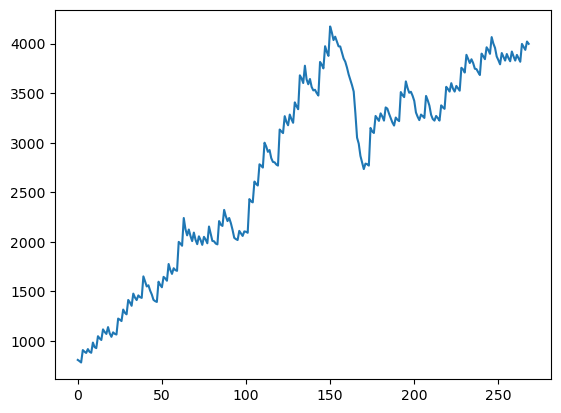

In [38]:
# check the distribution of data points across dates
X_train['date'].value_counts().sort_index().plot()

<Axes: xlabel='date'>

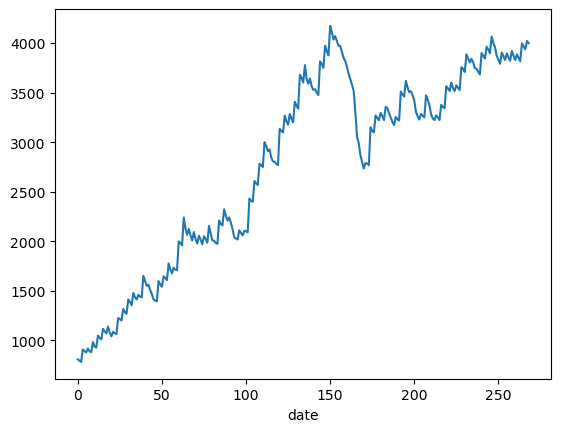

In [9]:
# number of assets per periods in the universe
X_train.groupby('date')['id'].nunique().plot()

In [10]:
y_train.nunique()

date       269
id      742670
y       531364
dtype: int64

In [11]:
# check the null value distribution
X_train.isnull().sum()

date    0
id      0
0       0
1       0
2       0
       ..
456     0
457     0
458     0
459     0
460     0
Length: 463, dtype: int64

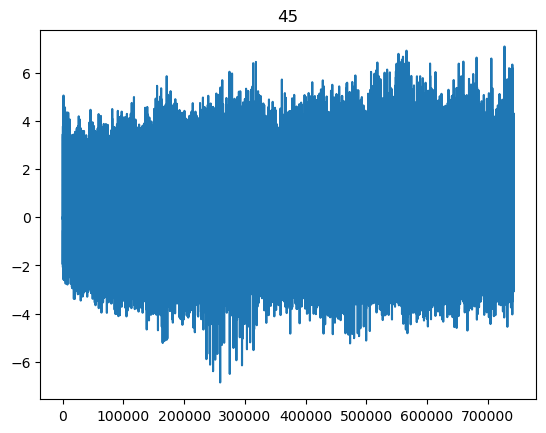

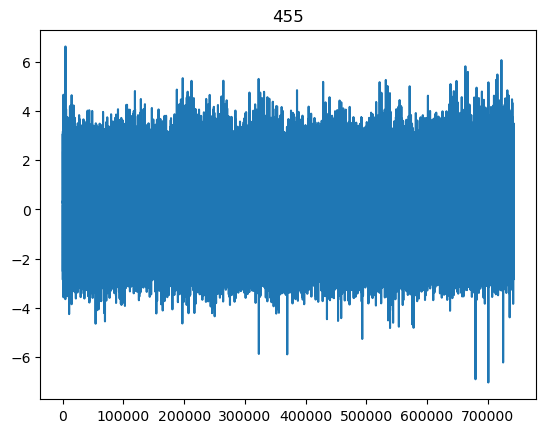

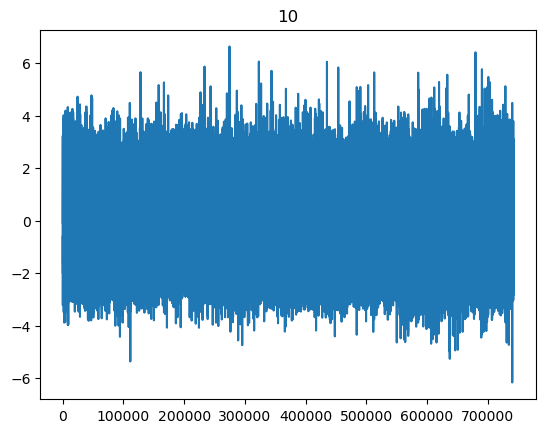

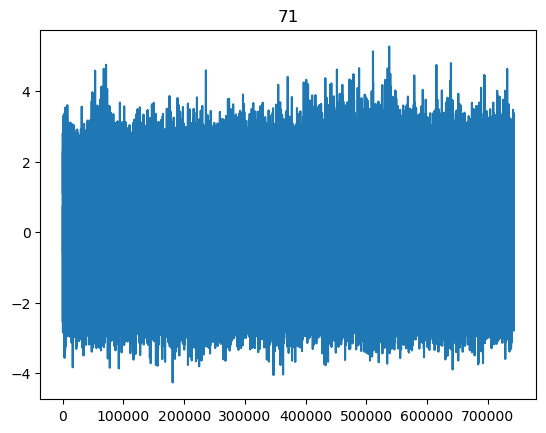

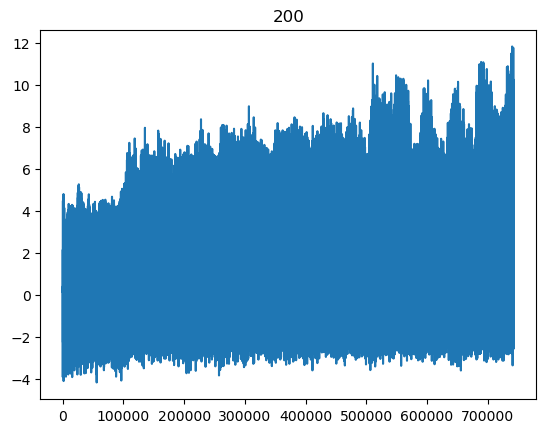

In [12]:
# We should now plot some of the features and observe them under different smoothing values. We do this in order to visually uncover dominant trends that otherwise may be obscured by noise or high volatility. Notice that by plotting features directly we are not accounting for the dates separation of values. This however still lets us understand global information about the universe. Namely, if features exhibit clear trends, then we may be able to interpret that effect as "universe drift". If universe drift is present, it could be an interesting effect to harness in our predictions

features=['45','455','10','71','200']
for feature in features:
    X_train[feature].plot()
    plt.title(feature)
    plt.show()



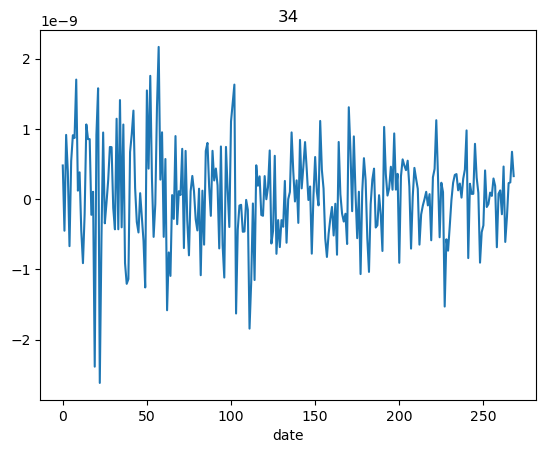

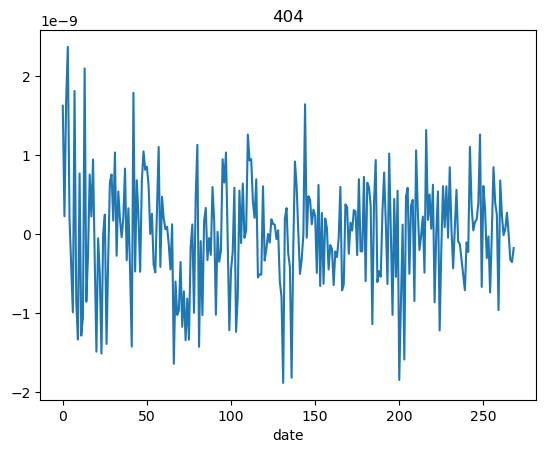

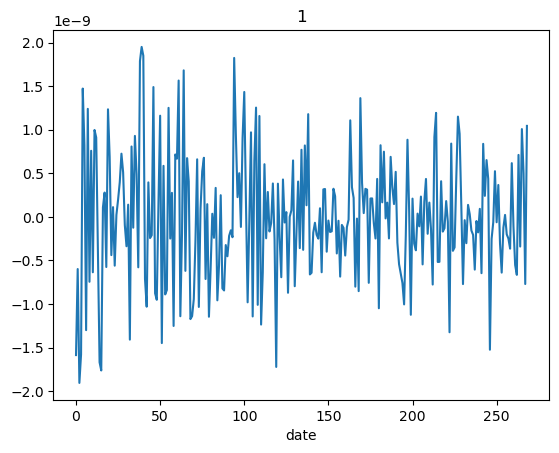

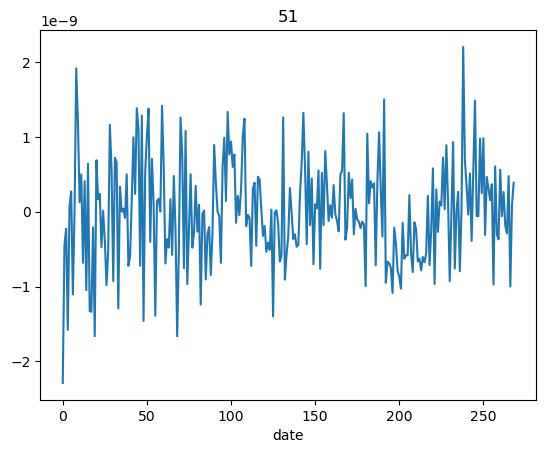

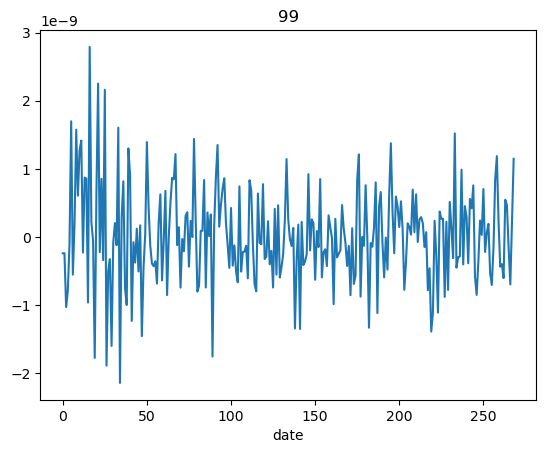

In [13]:
#mean per date plot of selected feature
features=['34','404','1','51','99']
for feature in features:
    X_train.groupby('date')[feature].mean().plot()
    plt.title(feature)
    plt.show()
    

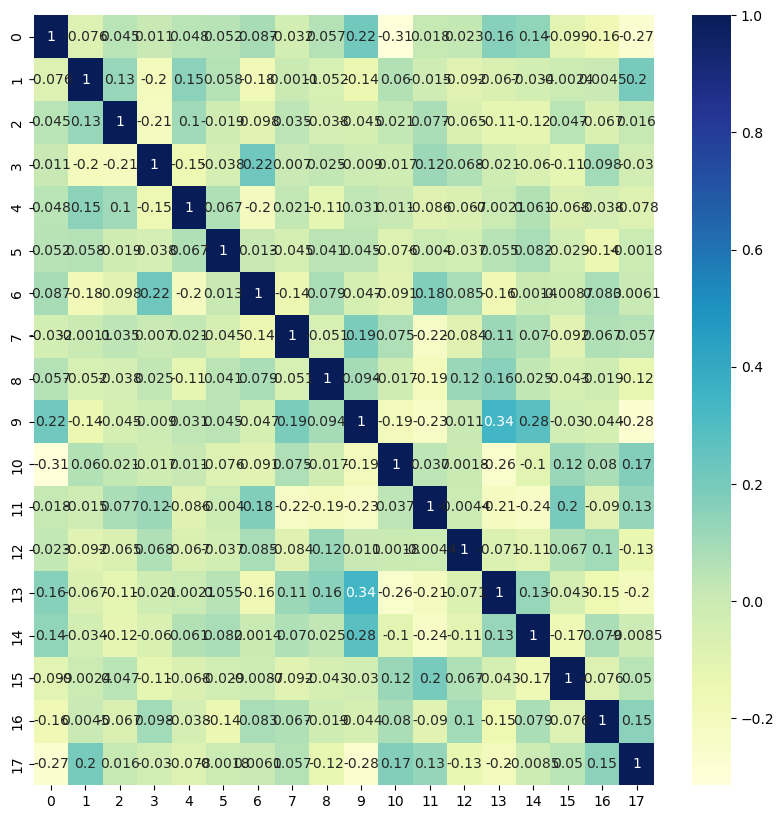

In [14]:
import seaborn as sns
#plot the correlation using numpy for features 2 to 20
corr = X_train.iloc[:,2:20].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

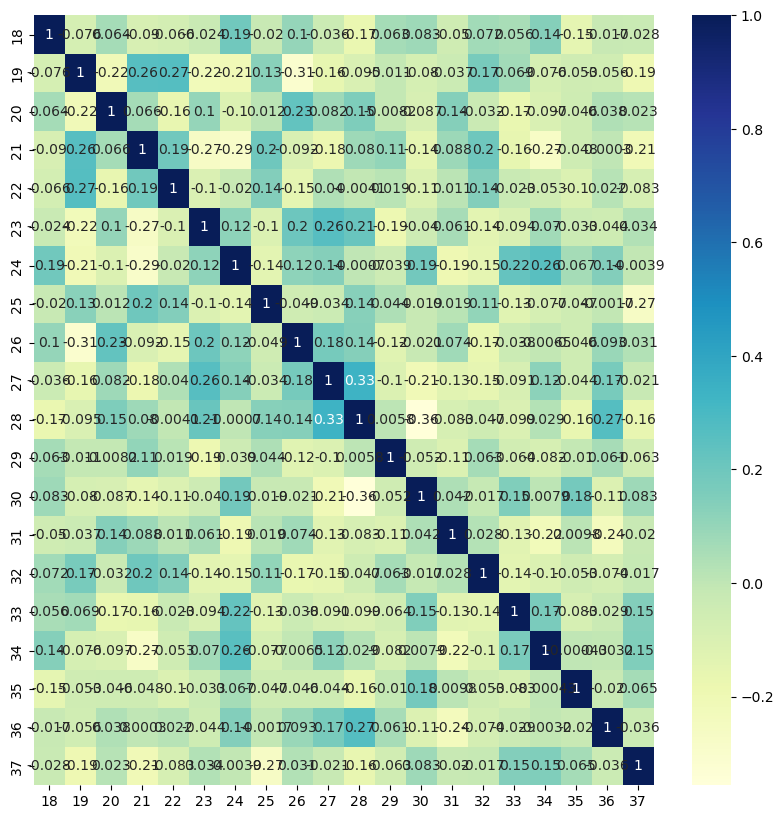

In [15]:
#plot the correlation using numpy for features 20 to 60
corr = X_train.iloc[:,20:40].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [16]:
#strongest available case is of negative correlation using numerical exploration
corr = np.corrcoef(X_train.iloc[:,2:],rowvar=False)
np.min(corr)

-0.49675897165763333

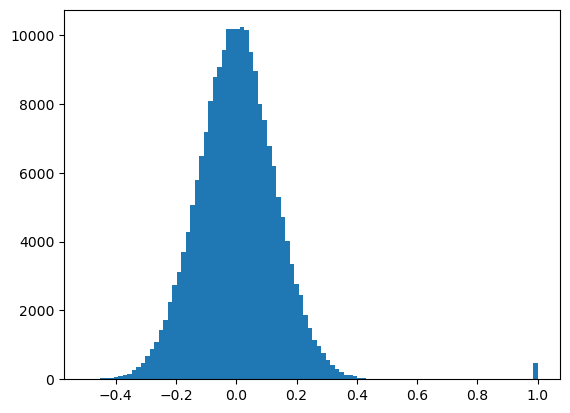

In [17]:
# The maximum value smaller than one can be deduced to correspond to the first non-trivial correlation comparison between variables (first distinct variables case). Let us check the values in a histogram.
plt.hist(corr.flatten(),bins=100)
plt.show()

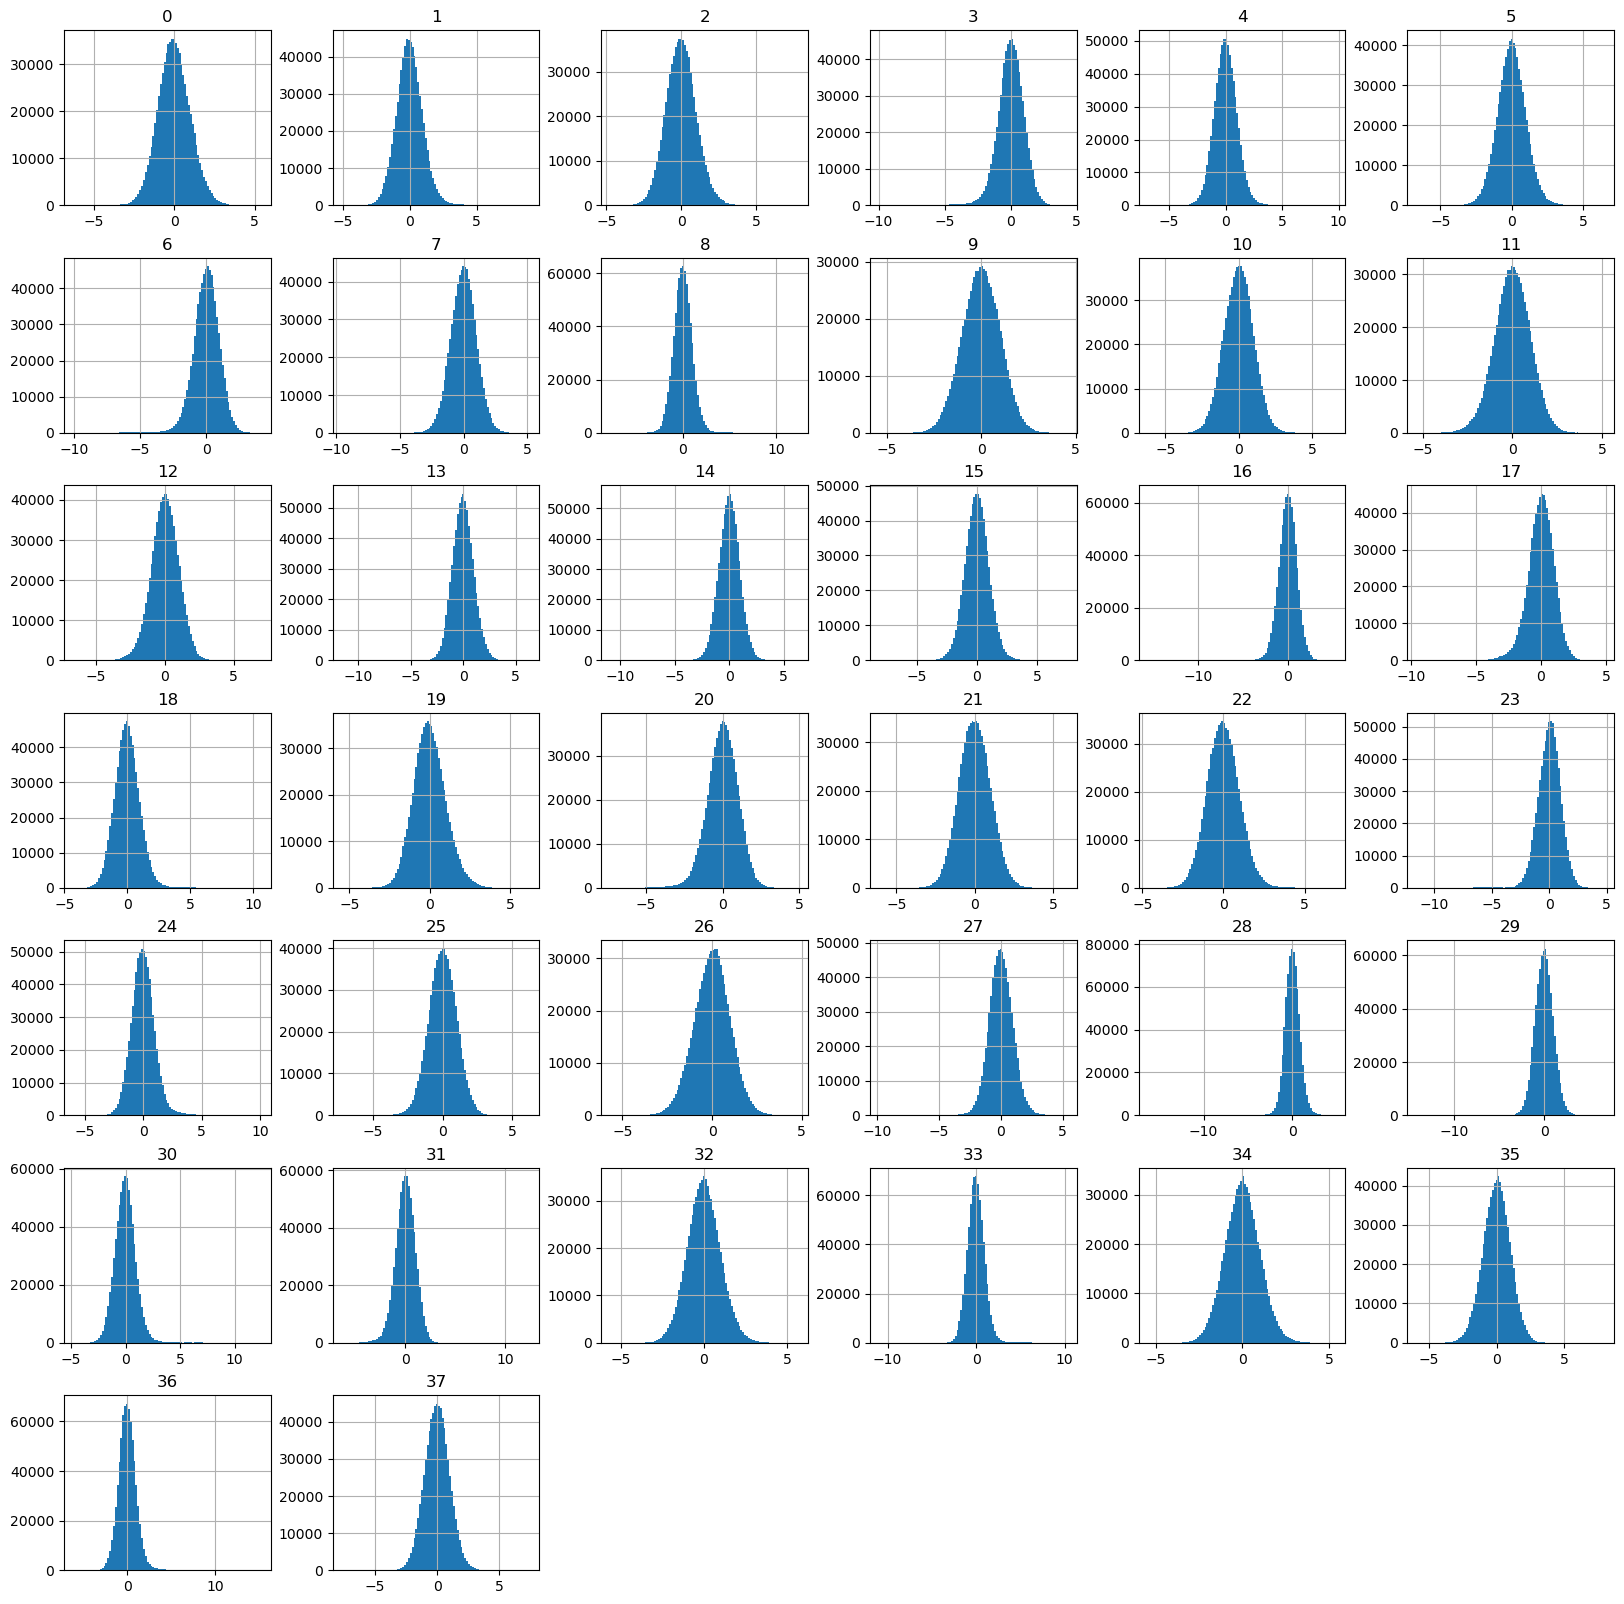

In [18]:
# frequency by which values or ranges of values occur in each feature 
X_train.iloc[:,2:40].hist(bins=100,figsize=(20,20))
plt.show()

In [19]:
!pip install statsmodels

In [20]:
from statsmodels.graphics.gofplots import qqplot

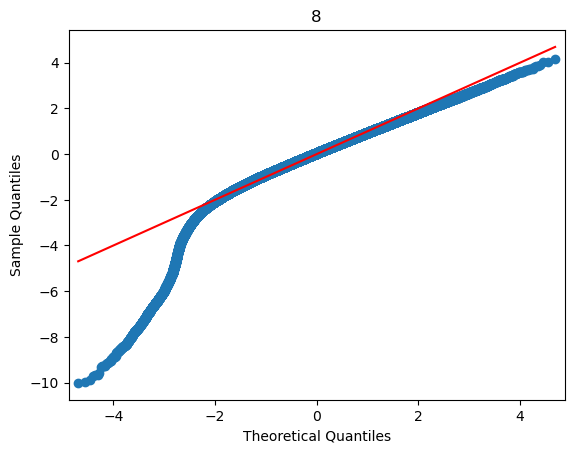

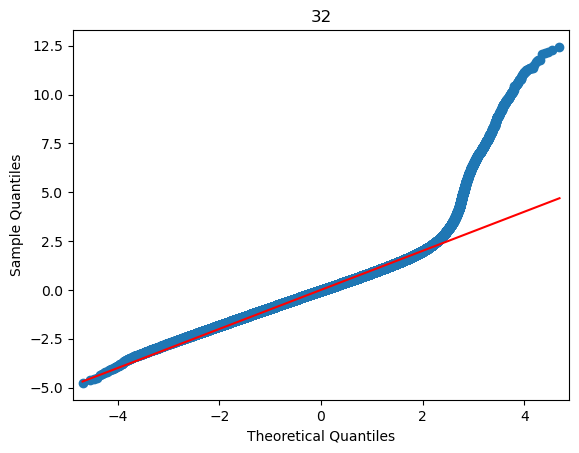

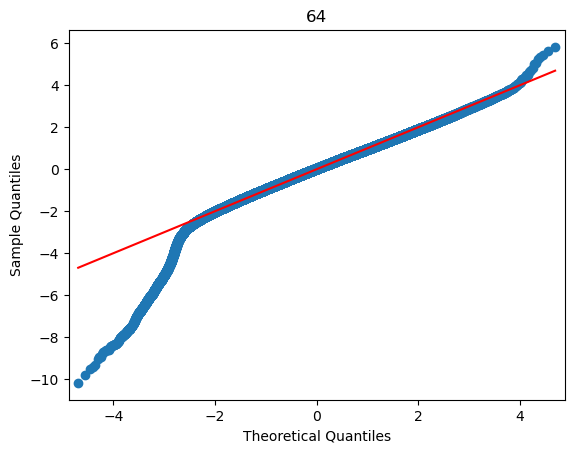

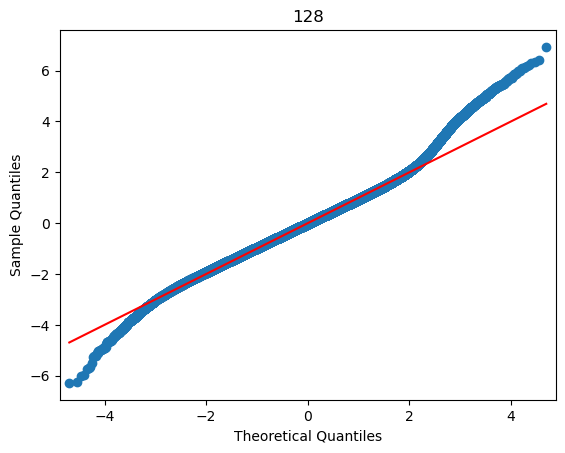

In [21]:
# The qqplot allows one to visually assess the degree of Gaussianity of a feature, by noticing how well the samples of the feature of analysis fit to the red line in the plot. Better fit implies closer to a pure Gaussian distribution.
feats = [8,32,64,128]
for feat in feats:
    qqplot(X_train.iloc[:,feat],line='s')
    plt.title(feat)
    plt.show()


In [22]:
from scipy.stats import shapiro

In [23]:
# hypothesis tests for Gaussianity
feats = [8,32,64,128]
for feat in feats:
    stat, p = shapiro(X_train.iloc[:,feat])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=0.963, p=0.000
Probably not Gaussian
Statistics=0.949, p=0.000
Probably not Gaussian
Statistics=0.983, p=0.000
Probably not Gaussian
Statistics=0.992, p=0.000
Probably not Gaussian


In [24]:
from scipy.stats import anderson

# hypothesis tests for Gaussianity
feats = [130,150,200,250,300]
for feat in feats:
    result = anderson(X_train.iloc[:,feat])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl))



Statistic: 26.012
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 206.809
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 40.303
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 49.519
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 6.311
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussia

In [25]:
#feature engineering
# We will now create a new feature that will be the average of the 5 features with the highest correlation with the target. We will then plot the new feature and the target to see if there is a clear relationship between them.
corr = X_train.corrwith(y_train)
corr = corr.abs().sort_values(ascending=False)
corr = corr[~corr.index.isin(['date','id'])]
corr = corr[:5]
corr


0     NaN
1     NaN
10    NaN
100   NaN
101   NaN
dtype: float64

In [7]:
# dropping the id feature
X_train = X_train.drop(['id'], axis=1)
y_train = y_train.drop(['id'], axis=1)

In [8]:
# Imports
import xgboost as xgb
import pandas as pd
import typing
import joblib
from pathlib import Path

In [10]:
#split the X_train  into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [11]:
with tf.device('/GPU:0'):
    #Create a model
    model = xgb.XGBRegressor(
        max_depth=5,
        learning_rate=0.01,
        n_estimators=1000,
        n_jobs=-1,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        tree_method='gpu_hist'
    )

    #fit the model
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        verbose=100
    )

[0]	validation_0-rmse:121.64848
[100]	validation_0-rmse:45.11590
[200]	validation_0-rmse:16.74920
[300]	validation_0-rmse:6.29802
[400]	validation_0-rmse:2.45007
[500]	validation_0-rmse:1.13111
[600]	validation_0-rmse:0.73085
[700]	validation_0-rmse:0.61671
[800]	validation_0-rmse:0.57317
[900]	validation_0-rmse:0.54998
[999]	validation_0-rmse:0.53371


In [12]:
#save the model
joblib.dump(model, 'model.pkl')

#load the model
model = joblib.load('model.pkl')

In [13]:
#drop the id in the test set
X_test = X_test.drop(['id'], axis=1)

In [14]:
predictions = model.predict(X_test)

In [15]:
predictions

array([[ 2.6784048e+02, -2.0024745e-02],
       [ 2.6792020e+02,  2.4805041e-02],
       [ 2.6785825e+02, -1.9391917e-02],
       ...,
       [ 2.6753247e+02, -7.0453323e-03],
       [ 2.6791391e+02,  2.7948454e-02],
       [ 2.6770898e+02, -5.9422262e-02]], dtype=float32)

In [17]:
# Reshape predictions array
predictions_reshaped = predictions.reshape(-1, 1)

# Create DataFrame and save predictions
pd.DataFrame(predictions_reshaped, columns=['target']).to_csv('submission.csv', index=False)
